<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Import" data-toc-modified-id="Data-Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Import</a></span><ul class="toc-item"><li><span><a href="#Imputing-missing-values" data-toc-modified-id="Imputing-missing-values-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imputing missing values</a></span></li></ul></li><li><span><a href="#Over-Sampling" data-toc-modified-id="Over-Sampling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Over Sampling</a></span></li><li><span><a href="#Under-&amp;-Over-Sampling" data-toc-modified-id="Under-&amp;-Over-Sampling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Under &amp; Over Sampling</a></span></li><li><span><a href="#Sampling-for-modelization" data-toc-modified-id="Sampling-for-modelization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sampling for modelization</a></span></li><li><span><a href="#Personalized-Metric" data-toc-modified-id="Personalized-Metric-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Personalized Metric</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-(Baseline)" data-toc-modified-id="Logistic-Regression-(Baseline)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic Regression (Baseline)</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Without-SMOTE" data-toc-modified-id="Without-SMOTE-6.1.1.1"><span class="toc-item-num">6.1.1.1&nbsp;&nbsp;</span>Without SMOTE</a></span></li><li><span><a href="#With-SMOTE" data-toc-modified-id="With-SMOTE-6.1.1.2"><span class="toc-item-num">6.1.1.2&nbsp;&nbsp;</span>With SMOTE</a></span></li></ul></li><li><span><a href="#Performances" data-toc-modified-id="Performances-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Performances</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Features importance</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Without-SMOTE" data-toc-modified-id="Without-SMOTE-6.2.1.1"><span class="toc-item-num">6.2.1.1&nbsp;&nbsp;</span>Without SMOTE</a></span></li><li><span><a href="#With-SMOTE" data-toc-modified-id="With-SMOTE-6.2.1.2"><span class="toc-item-num">6.2.1.2&nbsp;&nbsp;</span>With SMOTE</a></span></li></ul></li><li><span><a href="#Performances" data-toc-modified-id="Performances-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Performances</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Features importance</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Without-SMOTE" data-toc-modified-id="Without-SMOTE-6.3.1.1"><span class="toc-item-num">6.3.1.1&nbsp;&nbsp;</span>Without SMOTE</a></span></li><li><span><a href="#With-SMOTE" data-toc-modified-id="With-SMOTE-6.3.1.2"><span class="toc-item-num">6.3.1.2&nbsp;&nbsp;</span>With SMOTE</a></span></li></ul></li><li><span><a href="#Performances" data-toc-modified-id="Performances-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Performances</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Features importance</a></span></li></ul></li></ul></li><li><span><a href="#Best-Model" data-toc-modified-id="Best-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Best Model</a></span></li><li><span><a href="#Model-Saving" data-toc-modified-id="Model-Saving-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Saving</a></span></li><li><span><a href="#Pipeline-Saving" data-toc-modified-id="Pipeline-Saving-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Pipeline Saving</a></span></li></ul></div>

https://medium.com/henry-jia/how-to-score-your-credit-1c08dd73e2ed <br/>
https://towardsdatascience.com/intro-to-credit-scorecard-9afeaaa3725f

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
np.random.seed(42)

# Data Import

In [3]:
try:
    application_train = pd.read_csv('cleaned_data/application_train_cleaned.csv').drop(columns=['Unnamed: 0'])
except:
    application_train = pd.read_csv('cleaned_data/application_train_cleaned.csv')

try:
    application_test = pd.read_csv('cleaned_data/application_test_cleaned.csv').drop(columns=['Unnamed: 0'])
except:
    application_test = pd.read_csv('cleaned_data/application_test_cleaned.csv')
    
application_train = application_train.set_index('SK_ID_CURR')
application_test = application_test.set_index('SK_ID_CURR')

In [4]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,MEAN_BUILDING_SCORE_AVG,TOTAL_BUILDING_SCORE_AVG,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOTED_INTERVEL,BIRTH_REGISTRATION_INTERVEL,INCOME_PER_FAMILY_MEMBER,SEASON_REMAINING,RATIO_INCOME_GOODS,CHILDREN_RATIO
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.144336,2.0207,1,1.0,8824,5813.0,202500.0,25924.5,-148500.0,0.0
100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.206343,2.8888,1,0.0,15577,15579.0,135000.0,31801.5,-859500.0,0.0
100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,NaN,0.0000,0,0.0,18821,14786.0,67500.0,10125.0,-67500.0,0.0
100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,NaN,0.0000,1,0.0,15966,9172.0,67500.0,4063.5,-162000.0,0.0
100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,NaN,0.0000,1,0.0,16894,15621.0,121500.0,8509.5,-391500.0,0.0


In [5]:
application_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,MEAN_BUILDING_SCORE_AVG,TOTAL_BUILDING_SCORE_AVG,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOTED_INTERVEL,BIRTH_REGISTRATION_INTERVEL,INCOME_PER_FAMILY_MEMBER,SEASON_REMAINING,RATIO_INCOME_GOODS,CHILDREN_RATIO
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,7,...,0.235467,1.4128,1.0,27.664697,16912,14071.0,67500.0,13189.5,-315000.0,0.000000
100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,7,...,NaN,0.0000,1.0,15.824870,13595,8946.0,49500.0,7380.0,-81000.0,0.000000
100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,3,...,NaN,0.0000,1.0,14.505482,15580,17863.0,101250.0,-19152.0,-427500.0,0.000000
100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,7,...,0.323150,4.5241,1.0,35.130726,12110,11976.0,78750.0,29731.5,-1260000.0,0.500000
100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,7,...,NaN,0.0000,1.0,19.506034,10849,9040.0,60000.0,12933.0,-445500.0,0.333333


In [6]:
def isnan(data, aff_glob=True, aff_col=False):
    taille = len(data)
    nulle = []
    nbr_moy = []
    for i in data.columns:
        if any(pd.isna(data[i])):
            nbr = len(data[i])-len(data[i].dropna())
            if aff_glob == True:
                print("La colonne '{}'".format(i), "comporte", nbr, "/ {}".format(taille), "valeur(s) manquante(s)")
                print("Ce qui représente {}%".format(nbr/taille*100))
            if aff_col == True:
                print("La colonne '{}' comporte des valeurs manquantes".format(i))
            col = data[i]
            nulle.append(col)
            nbr_moy.append(nbr)
            
    nbr_moy = pd.DataFrame(nbr_moy, columns=['Nbr']).mean()
    print(len(nulle), "colonnes au total possèdent des valeurs manquantes")
    print(nbr_moy[0], "/ {}".format(taille), "valeurs sont manquantes en moyenne dans chaque colonne") 

In [7]:
isnan(application_train)

La colonne 'AMT_ANNUITY' comporte 12 / 307511 valeur(s) manquante(s)
Ce qui représente 0.003902299429939092%
La colonne 'AMT_GOODS_PRICE' comporte 278 / 307511 valeur(s) manquante(s)
Ce qui représente 0.09040327012692229%
La colonne 'OWN_CAR_AGE' comporte 202929 / 307511 valeur(s) manquante(s)
Ce qui représente 65.9908100848425%
La colonne 'CNT_FAM_MEMBERS' comporte 2 / 307511 valeur(s) manquante(s)
Ce qui représente 0.0006503832383231819%
La colonne 'EXT_SOURCE_1' comporte 173378 / 307511 valeur(s) manquante(s)
Ce qui représente 56.381072546998325%
La colonne 'EXT_SOURCE_2' comporte 660 / 307511 valeur(s) manquante(s)
Ce qui représente 0.21462646864665005%
La colonne 'EXT_SOURCE_3' comporte 60965 / 307511 valeur(s) manquante(s)
Ce qui représente 19.825307062186393%
La colonne 'APARTMENTS_AVG' comporte 156061 / 307511 valeur(s) manquante(s)
Ce qui représente 50.74972927797705%
La colonne 'BASEMENTAREA_AVG' comporte 179943 / 307511 valeur(s) manquante(s)
Ce qui représente 58.51595552679

## Imputing missing values

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean2 = SimpleImputer(missing_values=np.nan, strategy='mean')

application_train_cleaned = imp_mean.fit_transform(application_train)
application_train_cleaned = pd.DataFrame(application_train_cleaned,
                                         columns=application_train.columns,
                                         index=application_train.index)

application_test_cleaned = imp_mean2.fit_transform(application_test)
application_test_cleaned = pd.DataFrame(application_test_cleaned,
                                        columns=application_test.columns,
                                        index=application_test.index)

In [10]:
isnan(application_train_cleaned)

0 colonnes au total possèdent des valeurs manquantes
nan / 307511 valeurs sont manquantes en moyenne dans chaque colonne


# Over Sampling

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = application_train_cleaned.drop(columns=['TARGET'])
y = application_train_cleaned.TARGET

In [13]:
x_train_, x_test, y_train_, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [15]:
counter = Counter(y)
print(counter)

Counter({0.0: 282686, 1.0: 24825})


In [16]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train_, y_train_)

In [17]:
counter = Counter(y_res)
print(counter)

Counter({0.0: 226132, 1.0: 226132})


# Under & Over Sampling

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [19]:
counter = Counter(y)
print(counter)

Counter({0.0: 282686, 1.0: 24825})


In [20]:
over = SMOTE(sampling_strategy=0.2, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x_res, y_res = pipeline.fit_resample(x_train_, y_train_)

In [21]:
counter = Counter(y_res)
print(counter)

Counter({0.0: 90452, 1.0: 45226})


# Sampling for modelization

In [22]:
sample = np.random.randint(0, x_res.shape[0], 10000)
x_sample = x_res.iloc[sample,:]
y_sample = y_res[sample]
x_sample.shape

(10000, 132)

In [23]:
counter = Counter(y_sample)
print(counter)

Counter({0.0: 6643, 1.0: 3357})


In [24]:
sample_no_smote = np.random.randint(0, x_train_.shape[0], 10000)
x_train = x_train_.iloc[sample_no_smote,:]
y_train = y_train_.iloc[sample_no_smote]
x_train.shape

(10000, 132)

In [25]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 9195, 1.0: 805})


# Personalized Metric

Calculate the performances of the model

In [26]:
def personalizedMetric(model_name, data, pred, saving=True, scores=None):
    """This function calculate a score based on a personalized metric ; 
    It creates a dataframe if it does not already exist, allowing you to keep the scores
    of your models in memory"""
    # Df init
    if scores is not None:
        df = scores        
    else:
        df = pd.DataFrame(columns=['Model', 'Score', 'false_positive', 'false_negative', 'good_pred'])
    
    # Calculation of the score for current model:
    false_positive = 0
    false_negative = 0
    good_pred = 0
    model_score = 0
    for i, j in zip(data, pred):
        if i == j:
            good_pred += 1
            model_score += 0
        elif i != j:
            if i == 0:
                false_positive += 1
                model_score += 1
            elif i == 1:
                false_negative += 1
                model_score += 5
    
    # Put the results in the df
    results = {"Model":model_name, "Score":model_score,
               "false_positive":false_positive, "false_negative":false_negative,
               "good_pred":good_pred}
    
    # if saving == True:
    df = df.append(results, ignore_index=True)
    
    return df

Plot the comparaison between models ; Either between SMOTE/NON SMOTE models, or between all the models

In [27]:
def comparaison(scores, type_='SMOTE', model='Baseline'):
    width = 0.35
    scores_ = scores

    if type_ == 'SMOTE':
        try:
            scores = scores[(scores['Model'] == model) | (scores['Model'] == model + ' Without SMOTE')]
            x = np.arange(len(scores['Model']))
            fig, ax = plt.subplots(figsize=(10,5))
            rects1 = ax.bar(x - width/2, scores['Score'], width, label='Score')
            #rects2 = ax.bar(x + width/2, scores['false_positive'], width, label='false_positive')
            rects2 = ax.bar(x + width/2, scores['false_negative'], width, label='false_negative')
            ax.set_xticks(x)
            ax.set_xticklabels(scores['Model'])
            ax.set_ylabel('Value')
            plt.yscale('log')
            ax.legend()

            def autolabel(rects):
                """Attach a text label above each bar in *rects*, displaying its height."""
                for rect in rects:
                    height = rect.get_height()
                    ax.annotate('{}'.format(height),
                                xy=(rect.get_x() + rect.get_width() / 2, height),
                                xytext=(0, 1),  # 1 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')

            autolabel(rects1)
            autolabel(rects2)

            fig.tight_layout()

            plt.show()
            
        except:
            print('The model paramater that you gave is not present in the DataFrame, please use a good model name')
            print('Model name currently present : ')
            print(scores_['Model'])

    elif type_ == 'MODEL':
        scores = scores[~scores['Model'].str.contains('Without SMOTE')]
        x = np.arange(len(scores['Model']))
        fig, ax = plt.subplots(figsize=(10,5))
        rects1 = ax.bar(x - width/2, scores['Score'], width, label='Score')
        #rects2 = ax.bar(x + width/2, scores['false_positive'], width, label='false_positive')
        rects2 = ax.bar(x + width/2, scores['false_negative'], width, label='false_negative')
        ax.set_xticks(x)
        ax.set_xticklabels(scores['Model'])
        ax.set_ylabel('Value')
        plt.yscale('log')
        ax.legend()

        def autolabel(rects):
            """Attach a text label above each bar in *rects*, displaying its height."""
            for rect in rects:
                height = rect.get_height()
                ax.annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 1),  # 1 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

        autolabel(rects1)
        autolabel(rects2)

        fig.tight_layout()

        plt.show()
    
    else:
        print("Choose a correct type_ ; Available : MODEL, SMOTE. Default : SMOTE")

# Modeling

## Logistic Regression (Baseline)

In [28]:
from sklearn.linear_model import LogisticRegression

### Training

#### Without SMOTE

In [29]:
clf_no_smote = LogisticRegression(max_iter=1000, random_state=42).fit(x_train, y_train)
clf_predict_no_smote = clf_no_smote.predict(x_test)

#### With SMOTE

In [30]:
clf = LogisticRegression(max_iter=1000, random_state=42).fit(x_sample, y_sample)
clf_predict = clf.predict(x_test)
#clf_predict = pd.DataFrame(clf_predict, index=y_test.index, columns=['predict'])

### Performances

In [31]:
scores = personalizedMetric('Baseline', y_test, clf_predict)
scores = personalizedMetric('Baseline Without SMOTE', y_test, clf_predict_no_smote, scores=scores)
scores

,Model,Score,false_positive,false_negative,good_pred
0,Baseline,24646,576,4814,56113
1,Baseline Without SMOTE,24747,2,4949,56552


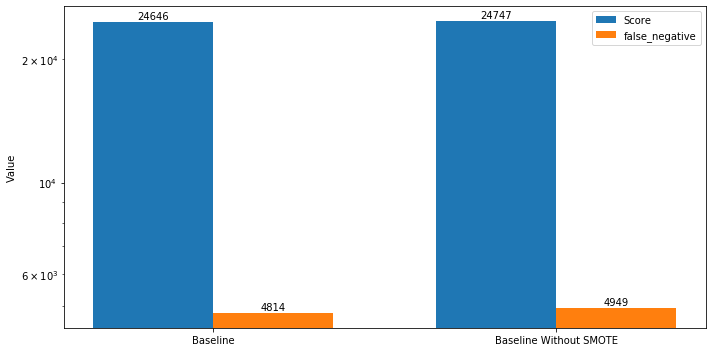

In [32]:
comparaison(scores, type_='SMOTE', model='Baseline')

As we can see here, without SMOTE the model does not seem to take into account the "1" class, the prediction looks good in general, but we are missing 1 class

### Features importance

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

### Training

#### Without SMOTE

In [34]:
# Nombre d'arbres dans la forêt
n_estimators = [int(x) for x in np.linspace(start=500, stop=2000, num=10)]
# Level max des arbres
max_depth = [int(x) for x in np.linspace(40, 140, num=10)]
max_depth.append(None)
# nombre de sample min pour split
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# On crée la random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

t0 = time.perf_counter()

rfc_no_smote = RandomForestClassifier()

# On recherche avec 100 combinaisons différentes 
rfc_no_smote = RandomizedSearchCV(estimator=rfc_no_smote, param_distributions=random_grid, n_iter=50, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# On fit
rfc_no_smote.fit(x_train, y_train)

t1 = time.perf_counter()
print("\n")
print ('Function elapsed in: ', t1-t0, 's')

rfc_no_smote.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.6min finished




Function elapsed in:  506.3444479 s


{'n_estimators': 1333,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 140,
 'bootstrap': False}

In [35]:
t0 = time.perf_counter()

rf_no_smote = RandomForestClassifier(n_estimators = list(rfc_no_smote.best_params_.values())[0],
                                     min_samples_split = list(rfc_no_smote.best_params_.values())[1],
                                     min_samples_leaf=list(rfc_no_smote.best_params_.values())[2],
                                     max_depth = list(rfc_no_smote.best_params_.values())[3],
                                     bootstrap=list(rfc_no_smote.best_params_.values())[4],
                                     n_jobs = -1)
rf_no_smote.fit(x_train, y_train)
# on prédit
y_predict_no_smote = rf_no_smote.predict_proba(x_test)

t1 = time.perf_counter()
print("\n")
print ('Function elapsed in: ', t1-t0, 's')

y_predict_df_no_smote = pd.DataFrame(y_predict_no_smote, index=y_test.index, columns=['Class0', 'Class1'])



Function elapsed in:  8.277959600000031 s


In [36]:
y_predict_no_smote = np.where(y_predict_no_smote[:,0] > 0.5, 0, 1)

#### With SMOTE

In [37]:
# Nombre d'arbres dans la forêt
n_estimators = [int(x) for x in np.linspace(start=500, stop=2000, num=10)]
# Level max des arbres
max_depth = [int(x) for x in np.linspace(40, 140, num=10)]
max_depth.append(None)
# nombre de sample min pour split
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# On crée la random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

t0 = time.perf_counter()

rfc = RandomForestClassifier()

# On recherche avec 100 combinaisons différentes 
rfc = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=50, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# On fit
rfc.fit(x_sample, y_sample)

t1 = time.perf_counter()
print("\n")
print ('Function elapsed in: ', t1-t0, 's')

rfc.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.5min finished




Function elapsed in:  520.9855224000001 s


{'n_estimators': 1833,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 117,
 'bootstrap': False}

In [38]:
t0 = time.perf_counter()

rf = RandomForestClassifier(n_estimators = list(rfc.best_params_.values())[0],
                             min_samples_split = list(rfc.best_params_.values())[1],
                             min_samples_leaf=list(rfc.best_params_.values())[2],
                             max_depth = list(rfc.best_params_.values())[3],
                             bootstrap=list(rfc.best_params_.values())[4],
                             n_jobs = -1)
rf.fit(x_sample, y_sample)
# on prédit
y_predict = rf.predict_proba(x_test)

t1 = time.perf_counter()
print("\n")
print ('Function elapsed in: ', t1-t0, 's')

y_predict_df = pd.DataFrame(y_predict, index=y_test.index, columns=['Class0', 'Class1'])



Function elapsed in:  16.839981799999805 s


In [39]:
y_predict = np.where(y_predict[:,0] > 0.5, 0, 1)

### Performances

In [40]:
scores = personalizedMetric('Random Forest', y_test, y_predict, scores=scores)
scores = personalizedMetric('Random Forest Without SMOTE', y_test, y_predict_no_smote, scores=scores)
scores

,Model,Score,false_positive,false_negative,good_pred
0,Baseline,24646,576,4814,56113
1,Baseline Without SMOTE,24747,2,4949,56552
2,Random Forest,23695,540,4631,56332
3,Random Forest Without SMOTE,24694,14,4936,56553


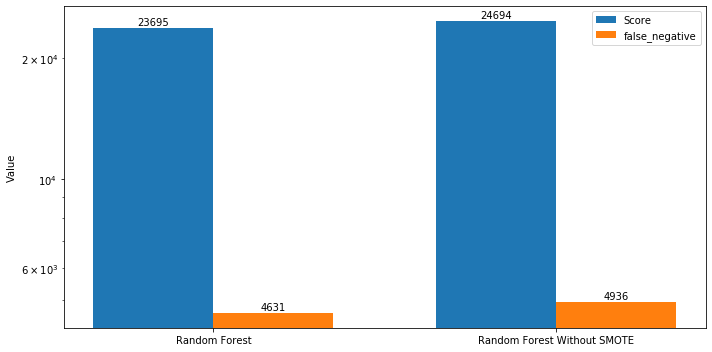

In [41]:
comparaison(scores, type_='SMOTE', model='Random Forest')

### Features importance

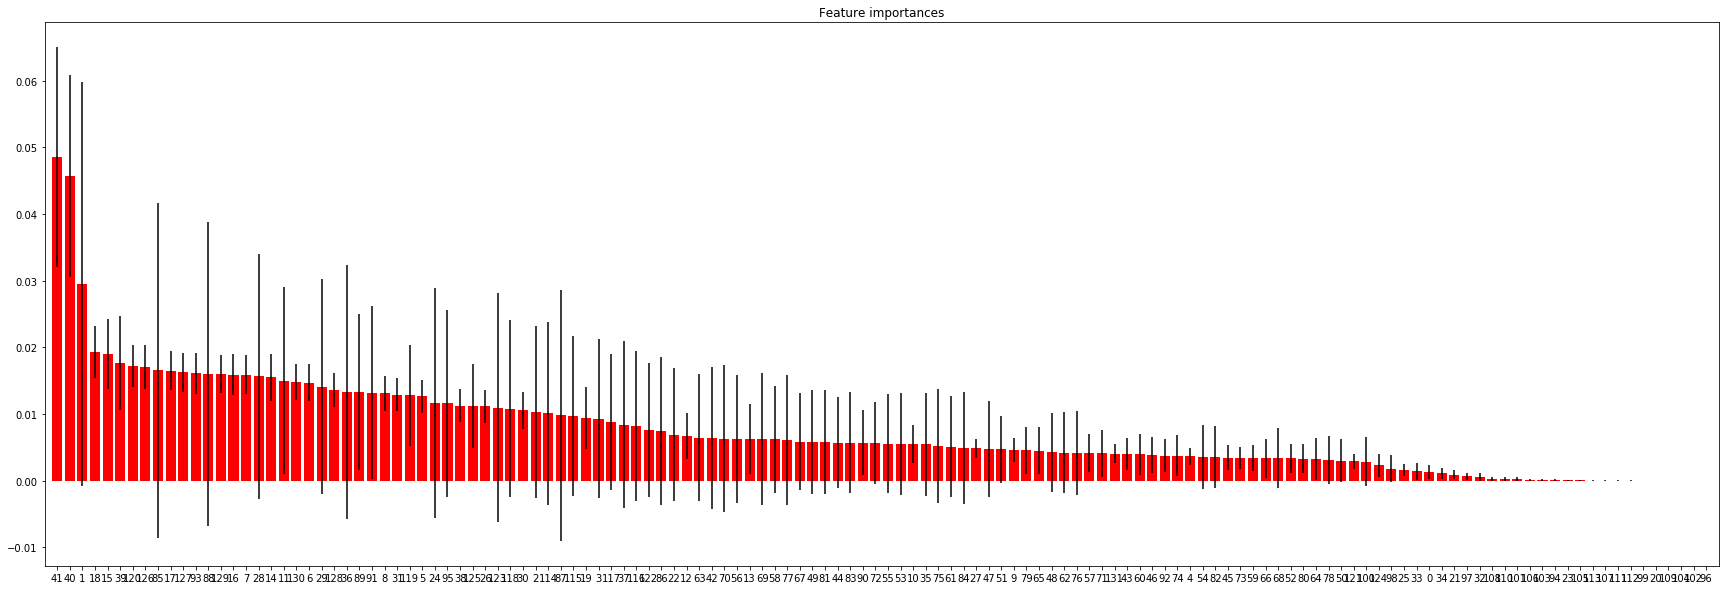

In [42]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(range(x_sample.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_sample.shape[1]), indices)
plt.xlim([-1, x_sample.shape[1]])
plt.show()

## XGBoost

In [43]:
import xgboost as xgb

In [44]:
dxsample = xgb.DMatrix(x_sample, label=y_sample)
dtrain  = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [45]:
param = {'learning_rate':0.05, 'max_depth':7, 'min_child_weight':40,
         'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

### Training

#### Without SMOTE

In [46]:
num_round = 10
bst_no_smote = xgb.train(param, dtrain, num_round)

In [47]:
ypred_no_smote = bst_no_smote.predict(dtest)
ypred_df_no_smote = pd.DataFrame(ypred_no_smote, index=y_test.index, columns=['Predict'])
ypred_df_no_smote['Predict_bool'] = np.where(ypred_df_no_smote['Predict']>0.50, 1, 0)
ypred_no_smote_ = ypred_df_no_smote['Predict']

#### With SMOTE

In [48]:
num_round = 10
bst = xgb.train(param, dxsample, num_round)

In [49]:
ypred = bst.predict(dtest)
ypred_df = pd.DataFrame(ypred, index=y_test.index, columns=['Predict'])
ypred_df['Predict_bool'] = np.where(ypred_df['Predict']>0.50, 1, 0)
ypred_ = ypred_df['Predict']

In [50]:
# Load model saved, usefull for after
#bst = xgb.Booster({'nthread': 4})  # init model
#bst.load_model('model.bin')  # load data

### Performances

In [51]:
scores = personalizedMetric('XGBoost', y_test, ypred_df['Predict_bool'], scores=scores)
scores = personalizedMetric('XGBoost Without SMOTE', y_test, ypred_df_no_smote['Predict_bool'], scores=scores)
scores

,Model,Score,false_positive,false_negative,good_pred
0,Baseline,24646,576,4814,56113
1,Baseline Without SMOTE,24747,2,4949,56552
2,Random Forest,23695,540,4631,56332
3,Random Forest Without SMOTE,24694,14,4936,56553
4,XGBoost,23582,4217,3873,53413
5,XGBoost Without SMOTE,24745,0,4949,56554


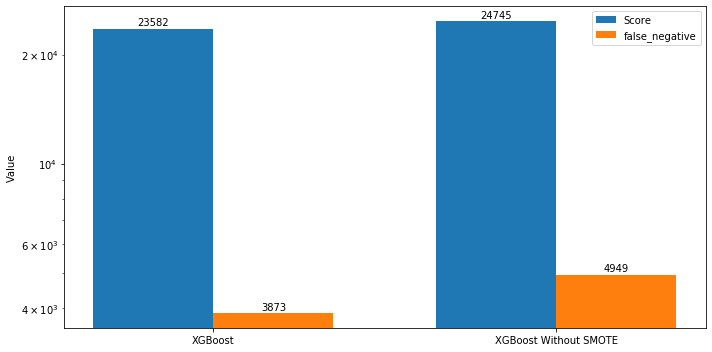

In [52]:
comparaison(scores, type_='SMOTE', model='XGBoost')

### Features importance

[]

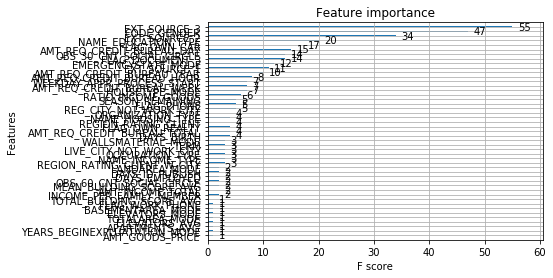

In [53]:
xgb.plot_importance(bst)
plt.plot()

The model is less effective if we watch only the accuracy score, but it understands better the problem and this time predict not only 0 values, but also 1 values

In [54]:
test = pd.merge(y_test, ypred_df, left_index=True, right_index=True, how='inner')
test[(test['Predict'] >= 0.4) & (test['Predict'] <= 0.49) & test['TARGET'] == 1]

,TARGET,Predict,Predict_bool
SK_ID_CURR,,,
134561,1.0,0.401375,0
373414,1.0,0.454070,0
231929,1.0,0.433264,0
189803,1.0,0.421327,0
138839,1.0,0.415006,0
...,...,...,...
242116,1.0,0.421983,0
255597,1.0,0.412880,0
449805,1.0,0.456579,0


There is 554 values that are wrongly predicted, but with average probability between 0.4 and 0.49 ; We need to go deeper into those values to see where the model could perform better

# Best Model

Let's see our DataFrame with the personalized metric:

In [55]:
scores

,Model,Score,false_positive,false_negative,good_pred
0,Baseline,24646,576,4814,56113
1,Baseline Without SMOTE,24747,2,4949,56552
2,Random Forest,23695,540,4631,56332
3,Random Forest Without SMOTE,24694,14,4936,56553
4,XGBoost,23582,4217,3873,53413
5,XGBoost Without SMOTE,24745,0,4949,56554


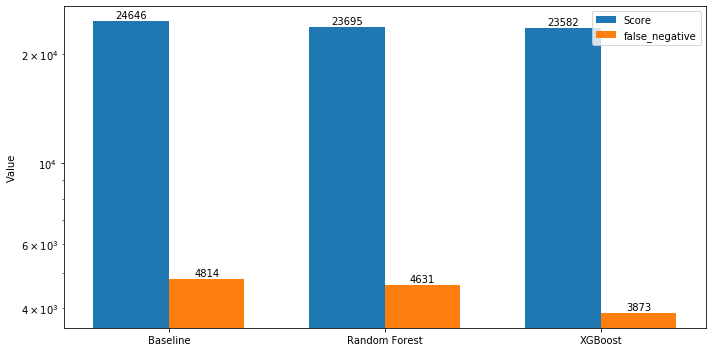

In [56]:
comparaison(scores, type_='MODEL')

The best model is the XGBoost model. The thing here is to reduce the number of false negative, in order for the bank to avoid loosing money. <br/>
So even if the number of good prediction is higher with the random forest (and even the baseline), XGBoost performs better in term of saving money

# Model Saving

In [57]:
bst.save_model('0001.model')
# bst.load_model('0001.model') for loading

# Pipeline Saving

We will set up a pipeline using scikit-learn. But as we have some features engineering we will also create a function that will make the features and then use the pipeline

In [58]:
# Steps

# 1 make the features engineering

# 2 Transform the categorical values

# 3 Standardization

# 4 

In [59]:
application_train['MEAN_BUILDING_SCORE_AVG']

SK_ID_CURR
100002    0.144336
100003    0.206343
100004         NaN
100006         NaN
100007         NaN
            ...   
456251    0.279721
456252    0.148900
456253    0.271192
456254    0.221260
456255    0.192844
Name: MEAN_BUILDING_SCORE_AVG, Length: 307511, dtype: float64